In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
dataset_dir = "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/mix6"

In [3]:
import os, sys
sys.path.append(os.path.normpath(os.path.join(os.getcwd(), '..')))
sys.path.append(os.path.normpath(os.path.join(os.getcwd(), '..', 'external', 'MiDaS')))
import matplotlib.pyplot as plt

from midas_hkrm.utils.img_utils import read_image

In [4]:
os.path.isdir(dataset_dir)

True

In [5]:
%env MIX6_DATASETS=/runai-ivrl-scratch/students/2021-fall-sp-jellouli/mix6

env: MIX6_DATASETS=/runai-ivrl-scratch/students/2021-fall-sp-jellouli/mix6


In [6]:
%env ZERO_SHOT_DATASETS=/runai-ivrl-scratch/students/2021-fall-sp-jellouli/zero_shot_datasets

env: ZERO_SHOT_DATASETS=/runai-ivrl-scratch/students/2021-fall-sp-jellouli/zero_shot_datasets


### BlendedMVS (bgr)

In [17]:
from midas_hkrm.datasets import BlendedMVS

In [ ]:
len

In [18]:
b_mvs = BlendedMVS()

In [19]:
len(b_mvs)

17819

In [10]:
from torch.utils.data import DataLoader

In [11]:
loader = DataLoader(b_mvs, batch_size=6, shuffle=True, collate_fn=lambda x:x)

In [12]:
loader = iter(loader)

In [13]:
samples = next(loader)

In [15]:
from midas_hkrm.utils import midas_train_transform

In [16]:
n_samples = [midas_train_transform(s) for s in samples]

In [17]:
imgs, disps = zip(*n_samples)

In [19]:
len(imgs)

6

In [31]:
shapes = enumerate([img.shape for img in imgs])

In [32]:
sorted_shapes = sorted(shapes, key=lambda x: x[1])

In [33]:
from itertools import groupby

In [36]:
grouped_shapes = groupby(sorted_shapes, key=lambda x:x[1])

In [35]:
sorted_shapes

[(0, torch.Size([1, 3, 288, 384])),
 (2, torch.Size([1, 3, 288, 384])),
 (4, torch.Size([1, 3, 288, 384])),
 (1, torch.Size([1, 3, 384, 384])),
 (3, torch.Size([1, 3, 384, 384])),
 (5, torch.Size([1, 3, 384, 384]))]

In [37]:
for a, indices in grouped_shapes:
    indices = [i[o]]
    print(list(indices))

[(0, torch.Size([1, 3, 288, 384])), (2, torch.Size([1, 3, 288, 384])), (4, torch.Size([1, 3, 288, 384]))]
[(1, torch.Size([1, 3, 384, 384])), (3, torch.Size([1, 3, 384, 384])), (5, torch.Size([1, 3, 384, 384]))]


In [95]:
img, disp = b_mvs[0]

In [96]:
plt.imshow(img)

In [13]:
plt.imshow(disp)

In [30]:
data = iter(b_mvs)

In [31]:
img, disp = next(data)

In [33]:
plt.imshow(img[:, :, ::1])

In [30]:
plt.imshow(disp)
plt.colorbar()

### ApolloScape (bgr)

In [14]:
from midas_hkrm.datasets import ApolloScape

In [15]:
dataset = ApolloScape()

In [16]:
len(dataset)

4156

In [26]:
img, disp = dataset[0]

In [27]:
plt.imshow(img[:, :, ::-1])

In [22]:
import matplotlib.pyplot as plt

In [23]:
plt.imshow(img)

In [24]:
plt.imshow(disp)
plt.colorbar()

### HRWSI (bgr)

In [11]:
from midas_hkrm.datasets import HRWSI

In [12]:
dataset = HRWSI()

In [13]:
len(dataset)

20378

In [30]:
img, disp = dataset[0]

In [31]:
plt.imshow(img[:,:,::-1])

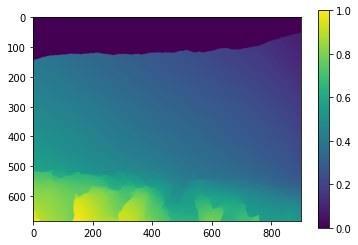

In [36]:
plt.imshow(disp)
plt.colorbar()

### RedWeb (bgr)

In [52]:
from midas_hkrm.datasets import RedWeb

In [40]:
dataset = RedWeb()

In [50]:
img, disp = dataset[3]

In [51]:
plt.imshow(img[:, :, ::-1])

In [52]:
plt.imshow(disp)
plt.colorbar()

### MegaDepth (bgr)

In [82]:
from midas_hkrm.datasets import MegaDepth

In [83]:
dataset = MegaDepth()

In [87]:
img, disp = dataset[1]

In [88]:
plt.imshow(img)

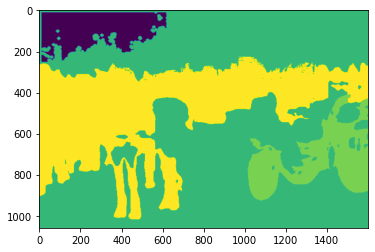

In [89]:
plt.imshow(disp)

### TartanAir (bgr)

In [8]:
from midas_hkrm.datasets import TartanAir

In [9]:
dataset = TartanAir()

In [10]:
len(dataset)

151152

In [124]:
p = "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/mix6/TartanAir/abandonedfactory/Easy/depth_left/P000/depth_left/000151_left_depth.npy"

In [125]:
import numpy as np

In [126]:
a = np.load(p)

In [127]:
a.shape

(480, 640)

In [128]:
img, disp = dataset[1]

In [129]:
import matplotlib.pyplot as plt

In [130]:
img.shape

(480, 640, 3)

In [39]:
plt.imshow(img[:,:,::-1])

In [40]:
plt.imshow(disp)
plt.colorbar()

## Data loading

In [8]:
from torch.utils.data import DataLoader
from midas_hkrm.datasets import *
from midas_hkrm.utils.data_utils import resize_collate

ModuleNotFoundError: No module named 'midas'

In [ ]:
hrwsi = HRWSI()

In [133]:
img, sample = hrwsi[0]

In [76]:
img.shape

(642, 900, 3)

In [77]:
import cv2

In [82]:
cv2.resize(img, (600, 900)).shape

(900, 600, 3)

In [99]:
loader = DataLoader(hrwsi, batch_size=8, collate_fn=lambda x: x)

In [100]:
loader_iter = iter(loader)

In [102]:
samples = next(loader_iter)

In [103]:
len(samples)

8

In [104]:
img, disp = zip(*samples)

In [107]:
[i.shape for i in img]

[(650, 900, 3),
 (660, 900, 3),
 (648, 900, 3),
 (655, 900, 3),
 (650, 900, 3),
 (664, 900, 3),
 (653, 900, 3),
 (657, 900, 3)]

In [108]:
[d.shape for d in disp]

[(650, 900),
 (660, 900),
 (648, 900),
 (655, 900),
 (650, 900),
 (664, 900),
 (653, 900),
 (657, 900)]

In [9]:
from hubconf import transforms

ModuleNotFoundError: No module named 'hubconf'

In [114]:
sys.path.append(os.path.normpath(os.path.join(os.getcwd(), '..', 'external', 'MiDaS')))

In [134]:
from midas.transforms import *

In [138]:
from torchvision.transforms import Compose
import torch

In [144]:
transform = Compose(
        [
            lambda s: {"image": s[0] / 255.0, "disparity": s[1]},
            Resize(
                384,
                384,
                resize_target=True,
                keep_aspect_ratio=True,
                ensure_multiple_of=32,
                resize_method="upper_bound",
                image_interpolation_method=cv2.INTER_CUBIC,
            ),
            NormalizeImage(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            PrepareForNet(),
            lambda sample: (torch.from_numpy(sample["image"]).unsqueeze(0), torch.from_numpy(sample["disparity"]).unsqueeze(0)) 
        ]
    )

In [147]:
i, d = transform(hrwsi[0])

In [148]:
i.shape

torch.Size([1, 3, 288, 384])

In [149]:
d.shape

torch.Size([1, 288, 384])

In [39]:
import torch

In [40]:
model = torch.load('/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output_midas_hkrm/state_0.tar')

In [42]:
model['train_losses']


{0: {'ApolloScape': 1.8770782947540283,
  'TartanAir': 2.5040481090545654,
  'ReDWeb_V1': 1.645240306854248,
  'BlendedMVS': 1.7552320957183838,
  'MegaDepth_v1': 1.8370640277862549,
  'HR-WSI': 1.5954811573028564}}

## ETH3D

In [82]:
from midas_hkrm.datasets import ETH3D
import cv2

In [83]:
import numpy as np 

In [86]:
dataset = ETH3D()

In [88]:
img, depth = dataset[0]

In [90]:
plt.imshow(depth)

In [89]:
len(dataset)

454

In [94]:
image_path, depth_path = dataset.all_samples[1]

In [101]:
dt = np.dtype('>f4') 

In [102]:
depth_raw = np.fromfile(depth_path, dtype=dt)

In [103]:
image = cv2.imread(image_path)

In [104]:
image.shape

(4032, 6048, 3)

In [105]:
depth = depth_raw.reshape(image.shape[:2])

In [106]:
depth[depth > 72] = 0

In [107]:
plt.imshow(image)

In [108]:
plt.imshow(depth)
plt.colorbar()
plt.show()

/runai-ivrl-scratch/students/2021-fall-sp-jellouli/anaconda3/envs/jellouli-env/lib/python3.9/site-packages/matplotlib/image.py:479: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


## NYU

In [61]:
from scipy.io import loadmat

import numpy as np
import h5py

import midas_hkrm
import midas_hkrm.datasets

from midas_hkrm.datasets import NYU

In [63]:
data_path = "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/zero_shot_datasets/NYU/nyu_depth_v2_labeled.mat"
split_path = "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/zero_shot_datasets/NYU/splits.mat"

In [64]:
dataset  = NYU(data_path, split_path)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [42]:
img, shape = dataset[10]

In [34]:
import matplotlib.pyplot as plt

In [52]:
plt.imshow(img / 255)

In [36]:
plt.imshow(img[:, :, ::1])

In [15]:
plt.imshow(shape)

In [16]:
from torch.utils.data import DataLoader

In [17]:
loader = DataLoader(dataset, batch_size=1, collate_fn=lambda x: x)

In [24]:
for s in loader:
    print(len(s[0]))

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


KeyboardInterrupt: 

In [23]:
type(dataset[0])

tuple

In [41]:
1 / 2


0.5

In [37]:
from scipy.io import loadmat

In [38]:
path = "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/zero_shot_datasets/NYU/splits.mat"

In [40]:
loadmat(path)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Jun  6 14:22:01 2012',
 '__version__': '1.0',
 '__globals__': [],
 'trainNdxs': array([[   3],
        [   4],
        [   5],
        [   6],
        [   7],
        [   8],
        [  10],
        [  11],
        [  12],
        [  13],
        [  19],
        [  20],
        [  22],
        [  23],
        [  24],
        [  25],
        [  26],
        [  27],
        [  44],
        [  45],
        [  48],
        [  49],
        [  50],
        [  51],
        [  52],
        [  53],
        [  54],
        [  55],
        [  58],
        [  64],
        [  65],
        [  66],
        [  67],
        [  68],
        [  69],
        [  70],
        [  71],
        [  72],
        [  73],
        [  74],
        [  75],
        [  80],
        [  81],
        [  82],
        [  83],
        [  92],
        [  93],
        [  94],
        [  95],
        [  96],
        [  97],
        [  98],
        [  99],


In [7]:
from midas_hkrm.datasets import ETH3D

In [8]:
dataset = ETH3D()

In [9]:
len(dataset)

454

In [30]:
from midas_hkrm.datasets import TUM

In [36]:
test_folder = '/runai-ivrl-scratch/students/2021-fall-sp-jellouli/zero_shot_datasets/TUM/rgbd_dataset_freiburg3_walking_static'

In [37]:
imgs = os.listdir(os.path.join(test_folder, 'rgb'))

In [38]:
depths = set(os.listdir(os.path.join(test_folder, 'depth')))

In [70]:
img

array([[[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [179, 169, 172],
        [192, 168, 172],
        [172, 147, 151]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [227, 235, 237],
        [241, 231, 236],
        [221, 211, 215]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [255, 253, 254],
        [254, 254, 254],
        [253, 253, 253]],

       ...,

       [[137, 149, 150],
        [148, 153, 155],
        [148, 153, 155],
        ...,
        [159, 145, 146],
        [160, 144, 145],
        [159, 142, 143]],

       [[126, 150, 149],
        [139, 153, 152],
        [140, 154, 153],
        ...,
        [161, 145, 144],
        [163, 144, 144],
        [160, 142, 143]],

       [[136, 149, 149],
        [143, 151, 153],
        [145, 153, 155],
        ...,
        [160, 145, 143],
        [163, 143, 143],
        [160, 142, 143]]

In [43]:
not_found = []
c = 0
for k in imgs:
    if k not in depths:
        not_found.append(k)
        c +=1

In [45]:
len(imgs)

743

In [34]:
with open('/runai-ivrl-scratch/students/2021-fall-sp-jellouli/zero_shot_datasets/TUM/rgbd_dataset_freiburg3_walking_static/depth.txt') as f :
    lines = f.readlines()

In [35]:
lines

['# depth maps\n',
 "# file: 'rgbd_dataset_freiburg3_walking_static.bag'\n",
 '# timestamp filename\n',
 '1341846226.817948 depth/1341846226.817948.png\n',
 '1341846226.850341 depth/1341846226.850341.png\n',
 '1341846226.881917 depth/1341846226.881917.png\n',
 '1341846226.918015 depth/1341846226.918015.png\n',
 '1341846226.950012 depth/1341846226.950012.png\n',
 '1341846226.985992 depth/1341846226.985992.png\n',
 '1341846227.017931 depth/1341846227.017931.png\n',
 '1341846227.050076 depth/1341846227.050076.png\n',
 '1341846227.085994 depth/1341846227.085994.png\n',
 '1341846227.118071 depth/1341846227.118071.png\n',
 '1341846227.149948 depth/1341846227.149948.png\n',
 '1341846227.186069 depth/1341846227.186069.png\n',
 '1341846227.219317 depth/1341846227.219317.png\n',
 '1341846227.253952 depth/1341846227.253952.png\n',
 '1341846227.286003 depth/1341846227.286003.png\n',
 '1341846227.320103 depth/1341846227.320103.png\n',
 '1341846227.354005 depth/1341846227.354005.png\n',
 '1341846227

In [65]:
dataset = TUM()

In [66]:
len(dataset)

5380

In [69]:
for i in range(len(dataset)):
    i, d = dataset[i]
    assert i is not None
    assert d is not None

In [62]:
img, depth = dataset[0]

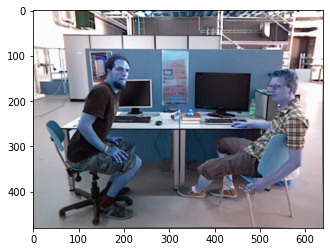

In [63]:
plt.imshow(img)

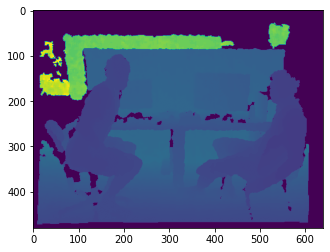

In [64]:
plt.imshow(depth)

In [24]:
dataset.locations

[{'imgs': 'rgbd_dataset_freiburg3_walking_static/rgb',
  'labels': 'rgbd_dataset_freiburg3_walking_static/depth'},
 {'imgs': 'rgbd_dataset_freiburg2_desk_with_person/rgb',
  'labels': 'rgbd_dataset_freiburg2_desk_with_person/depth'},
 {'imgs': 'rgbd_dataset_freiburg3_sitting_static/rgb',
  'labels': 'rgbd_dataset_freiburg3_sitting_static/depth'}]

TypeError: Image data of dtype object cannot be converted to float

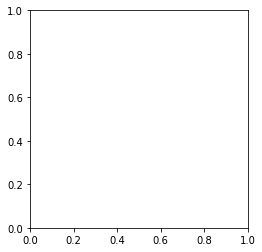

In [23]:
plt.imshow(depth)

In [18]:
type(depth)

NoneType